## Exercise 6.5

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

#set paths
path = r'Data'

%matplotlib inline

#import data
hate_crime_split = pd.read_csv(os.path.join(path,'hate_crime_split.csv'), dtype = {'JUVENILE_OFFENDER_COUNT' : int})

In [30]:
hate_crime_split.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENSE_NAME.2,OFFENSE_NAME.3,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME.1,LOCATION_NAME.2,BIAS_DESC,VICTIM_TYPES.1,VICTIM_TYPES.2,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-Black or African American,Individual,NaN,S,S
1,3016,1991,AR0290100,Hope,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-White,Individual,NaN,S,S
2,43,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Residence/Home,NaN,Anti-Black or African American,Individual,NaN,S,S
3,44,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,Destruction/Damage/Vandalism of Property,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-White,Individual,NaN,M,S
4,3017,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Service/Gas Station,NaN,Anti-White,Individual,NaN,S,S


In [38]:
hate_crime_split_2 = hate_crime_split.drop(['INCIDENT_ID', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY', 'OFFENSE_NAME.1', 'OFFENSE_NAME.2', 'OFFENSE_NAME.3', 'LOCATION_NAME.1', 'LOCATION_NAME.2', 'BIAS_DESC', 'VICTIM_TYPES.1', 'VICTIM_TYPES.2', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],axis=1)

In [39]:
hate_crime_split_2.head()

,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
0,1991,0,0,1,0,0,1,1.0
1,1991,0,0,1,0,0,1,1.0
2,1991,0,0,1,0,0,1,1.0
3,1991,0,0,1,0,0,2,1.0
4,1991,0,0,1,0,0,1,1.0


In [43]:
hate_crime_split_2 = hate_crime_split_2.fillna(0)

## Elbow Technique

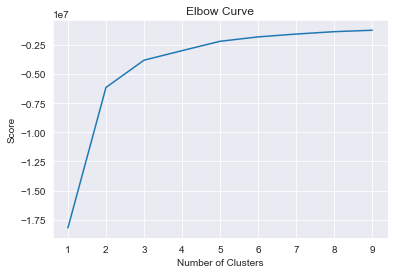

In [44]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(hate_crime_split_2).score(hate_crime_split_2) for i in range(len(kmeans))]

score

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal cluster count is 3

## K-means Clustering

In [46]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(hate_crime_split_2)

KMeans(n_clusters=3)

In [47]:
hate_crime_split_2['clusters'] = kmeans.fit_predict(hate_crime_split_2)
hate_crime_split_2.head()

,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS,clusters
0,1991,0,0,1,0,0,1,1.0,2
1,1991,0,0,1,0,0,1,1.0,2
2,1991,0,0,1,0,0,1,1.0,2
3,1991,0,0,1,0,0,2,1.0,2
4,1991,0,0,1,0,0,1,1.0,2


In [48]:
hate_crime_split_2['clusters'].value_counts()

1    76476
2    73735
0    69366
Name: clusters, dtype: int64

### Adult Offenders versus Total Victims

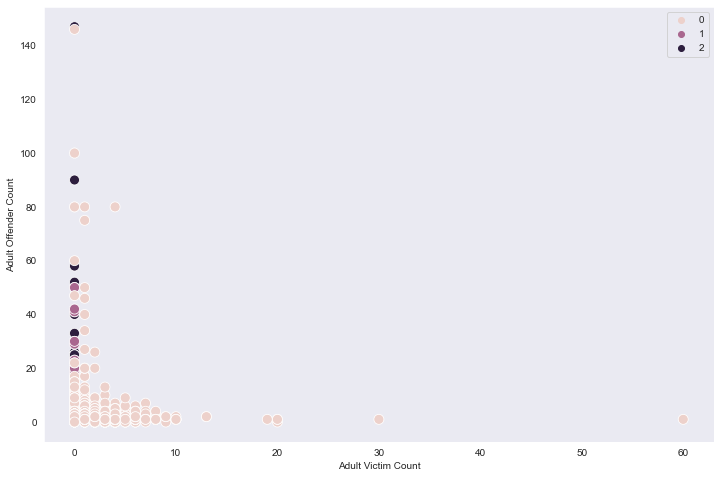

In [53]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=hate_crime_split_2['ADULT_OFFENDER_COUNT'], y=hate_crime_split_2['TOTAL_INDIVIDUAL_VICTIMS'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Adult Offender Count')
plt.ylabel('Total Individual Victims')
plt.show()

### Juvenile Offender Count vs Total Individual Victims

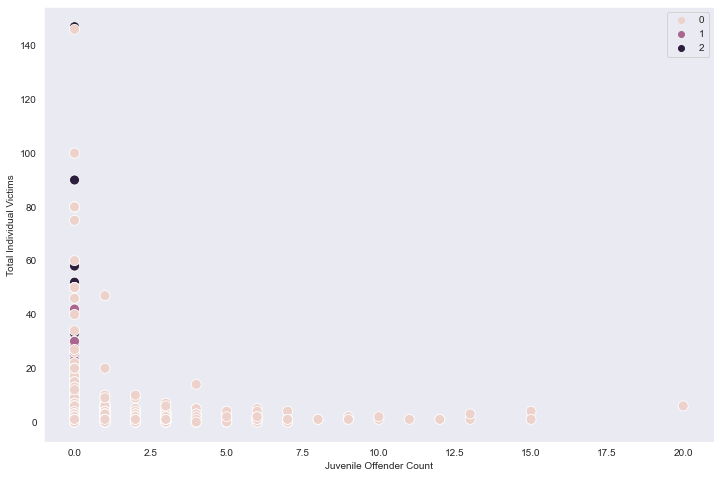

In [54]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=hate_crime_split_2['JUVENILE_OFFENDER_COUNT'], y=hate_crime_split_2['TOTAL_INDIVIDUAL_VICTIMS'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Juvenile Offender Count')
plt.ylabel('Total Individual Victims')
plt.show()

In [55]:
hate_crime_split_2.loc[hate_crime_split_2['clusters'] == 2, 'cluster'] = 'dark purple'
hate_crime_split_2.loc[hate_crime_split_2['clusters'] == 1, 'cluster'] = 'purple'
hate_crime_split_2.loc[hate_crime_split_2['clusters'] == 0, 'cluster'] = 'pink'
hate_crime_split_2.groupby('cluster').agg({'ADULT_OFFENDER_COUNT': ['mean', 'median'],
                           'JUVENILE_OFFENDER_COUNT': ['mean', 'median'],
                           'TOTAL_INDIVIDUAL_VICTIMS': ['mean', 'median']})

ADULT_OFFENDER_COUNT        JUVENILE_OFFENDER_COUNT         \
                            mean median                    mean median   
cluster                                                                  
dark purple             0.000014    0.0                0.000000    0.0   
pink                    0.372430    0.0                0.067194    0.0   
purple                  0.000026    0.0                0.000105    0.0   

            TOTAL_INDIVIDUAL_VICTIMS         
                                mean median  
cluster                                      
dark purple                 1.025971    1.0  
pink                        0.992590    1.0  
purple                      0.892999    1.0

These clusters do not appear to insightful. More work needs to be done on the qualitative variable to derive more meaning from the data.